In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Balaji Fast Food Sales.csv')


In [ ]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [ ]:
df['date'] = df['date'].str.replace('/', '-')
print(df['date'])
df.head(10)

0      07-03-2022
1       8-23-2022
2      11-20-2022
3      02-03-2023
4      10-02-2022
          ...    
995     3-19-2023
996     9-20-2022
997     1-26-2023
998     8-27-2022
999     5-29-2022
Name: date, Length: 1000, dtype: object


,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8-23-2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11-20-2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
5,6,11-14-2022,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening
6,7,05-03-2022,Sugarcane juice,Beverages,25,9,225,Cash,Mr.,Evening
7,8,12-22-2022,Panipuri,Fastfood,20,14,280,Online,Mr.,Night
8,9,06-10-2022,Panipuri,Fastfood,20,1,20,Cash,Mrs.,Morning
9,10,9-16-2022,Panipuri,Fastfood,20,5,100,Online,Mr.,Afternoon


In [ ]:
# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'], format='%m-%d-%Y')

# Extract the month and year from the 'date' column
df['month_year'] = df['date'].dt.to_period('M')
df['month_year']
# Group the data by month and sum the 'total' column to get monthly sales
monthly_sales = df.groupby('month_year')['transaction_amount'].sum()
monthly_sales




,transaction_amount
month_year,
2022-04,17670
2022-05,26570
2022-06,17335
2022-07,19490
2022-08,22305
2022-09,18640
2022-10,27205
2022-11,22900
2022-12,23460


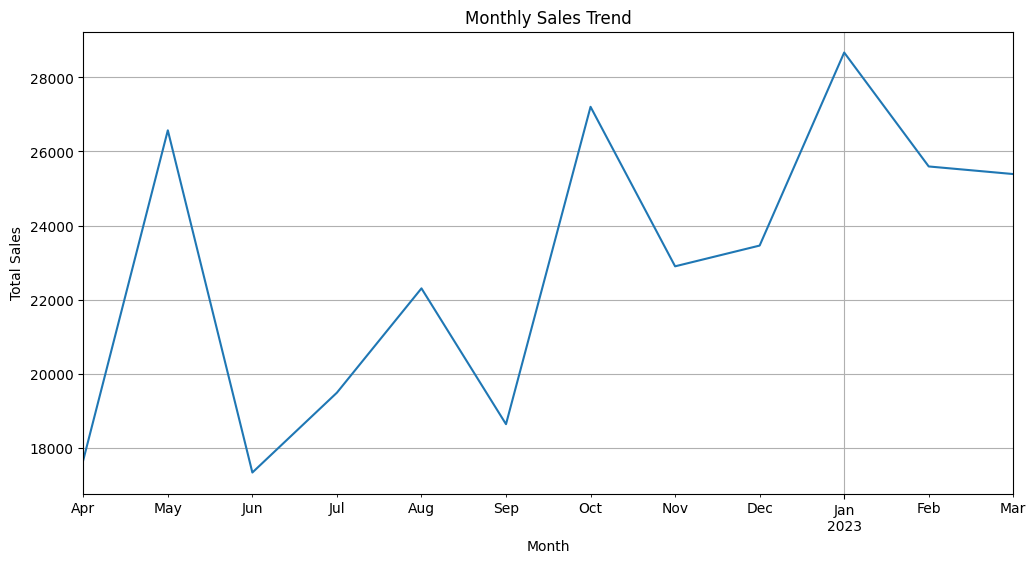

In [ ]:
# Plot the monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.grid(True)
plt.show()

In [ ]:
# Extract the month and year from the 'date' column
df['daily'] = df['date'].dt.to_period('D')
df['daily']
# Group the data by month and sum the 'total' column to get monthly sales
daily_sales = df.groupby('daily')['transaction_amount'].sum()
daily_sales

,transaction_amount
daily,
2022-04-01,420
2022-04-02,1500
2022-04-03,480
2022-04-04,2500
2022-04-05,100
...,...
2023-03-25,840
2023-03-26,280
2023-03-27,1040


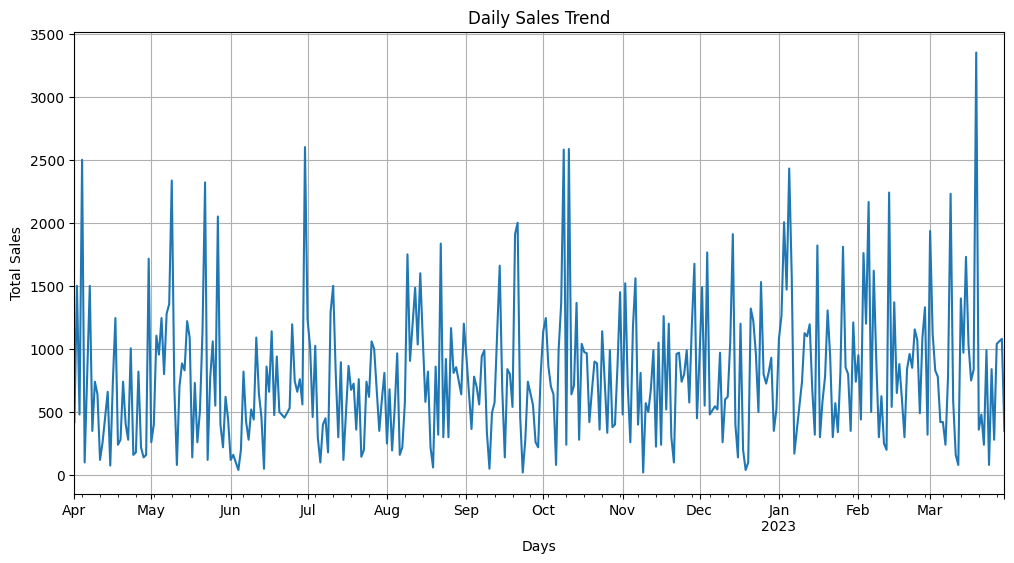

In [ ]:
# Plot the monthly sales trend
plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line')
plt.xlabel('Days')
plt.ylabel('Total Sales')
plt.title('Daily Sales Trend')
plt.grid(True)
plt.show()